# Time Series Analysis 

## STEP 1 : Data Acquisition
The meta data of the numerous experiements is stored in seperate excel file. This files allows selection of a particular experiment, whose data is to be processed.

In [2]:
# Importing libraries
import pandas as pd

In [3]:
# Gathering meta data from excel
path_sv = r"data\SVM20211216.xlsx"
df_sv = pd.read_excel(path_sv)
exDt = df_sv['ExpName']
exMC = df_sv['MC_0']
exDM = df_sv['DryMass_f']
exWt = df_sv['Weight_0']

In [4]:
df_sv.head(5)

,Date,ExpName,ExpNo,Temp,Vel,Nos,Radius,Volume_0,Weight_0,Density_0,...,Volume_f,Weight_f,Density_f,MC_f,Water_f,DryMass_f,Logger_0,Logger_f,Error_0,Error_f
0,2021-12-20,01_20211220_,1,40,0.3,76,0.864945,206.0,209.933,1019.092233,...,32,39.025,1219.531250,0.321204,12.535,26.490,180.1281,39.083000,29.8049,-0.058000
1,2021-12-30,02_20211230_,2,40,1.5,71,0.850553,183.0,201.324,1100.131148,...,30,36.625,1220.833333,0.194894,7.138,29.487,179.6676,35.034200,21.6564,1.590800
2,2022-01-03,03_20220103_,3,40,1.5,65,0.894700,195.0,200.289,1027.123077,...,31,39.775,1283.064516,0.238592,9.490,30.285,192.0907,34.924200,8.1983,4.850800
3,2022-01-08,04_20220108_,4,45,1.0,66,0.879377,188.0,200.785,1068.005319,...,37,32.746,885.027027,0.346149,11.335,21.411,180.6049,6.292500,20.1801,26.453500
4,2022-01-20,05_20220120_,5,55,1.0,55,0.944315,194.0,203.559,1049.273196,...,23,29.494,1282.347826,0.131078,3.866,25.628,232.9592,-4.259097,-29.4002,33.753097


- __Details of experiments__ : The first three columns represent the date, name and number of experiments. 
- __Details of environment__ : The next two columns are the properties of the drying environment which are defined by the set points for air temperature and air velocity.
- __Details of substrate__ : The columns 6 and 7 are properties of the products, that are number of grape berries and the average radius of the grape berry at the inception of the experiment.
- __Details of first and last reading taken manually__ :Columns 7 to 12 and columns 14 to 2 are the properties of the products before and after the experments are completed.
- __Detials of data logger calibaration__ : Finally the last two columns are the errors in the measurement of the data logger that are calibarated using a micro balance

In [5]:
df_sv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       11 non-null     datetime64[ns]
 1   ExpName    11 non-null     object        
 2   ExpNo      11 non-null     int64         
 3   Temp       11 non-null     int64         
 4   Vel        11 non-null     float64       
 5   Nos        11 non-null     int64         
 6   Radius     11 non-null     float64       
 7   Volume_0   11 non-null     float64       
 8   Weight_0   11 non-null     float64       
 9   Density_0  11 non-null     float64       
 10  MC_0       11 non-null     float64       
 11  Water_0    11 non-null     float64       
 12  DryMass_0  11 non-null     float64       
 13  Volume_f   11 non-null     int64         
 14  Weight_f   11 non-null     float64       
 15  Density_f  11 non-null     float64       
 16  MC_f       11 non-null     float64       
 17 

In [6]:
# This folder hosts data for each of the 11 experiments
path_collection  = r"data"

Each folder contains csv files created by the data logger. Every hour new file is created for ease of handling. Experiments are are run upto 10 days, and approximately 240 files are created. These files are collected in seperate folders for each experiments.
***
### User defined library
A user defined librabry name __dryCurveFunctions__ is created which contains multiple function necessary for this analysis. Each of these functions are called during Data aquisition, Cleaning, Pre-processing and EDA.

In [7]:
# Importing Essential Libraries
from dryCurveFunctions import dryingCurve as dc

In [8]:
# State Vector / Experiment Selection
exp   = -1 + 10

# Calibration: If Tray weight is not calibrated into the data logger, this value changes to weight of the tray being used.
TrayW = 0 

# Displays details of experiment under consideration
print("Analysis of Data at location :  " + path_collection + "\\" + exDt[exp])
print("Experiment         = ", exDt[exp])
print("Initial MC (MC(wb))= ", round(exMC[exp],3))
print("Dry Mass   (grams) = ", round(exDM[exp],3))
print("Initial Wt (grams) = ", round(exWt[exp],3))

Analysis of Data at location :  data\10_20220316_
Experiment         =  10_20220316_
Initial MC (MC(wb))=  0.785
Dry Mass   (grams) =  48.459
Initial Wt (grams) =  217.398


##### Multiple csv files are concatenated using the concat function as shown in below snippet

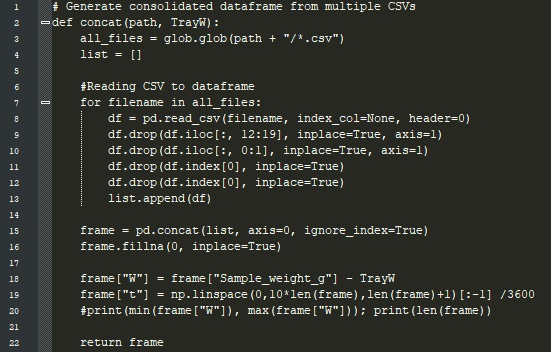

In [9]:
# Importing data into dataframe using glob
frame = dc.concat(path_collection + "\\" + exDt[exp], TrayW)
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128729 entries, 0 to 128728
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date             128729 non-null  object 
 1   Time             128729 non-null  object 
 2   T_ambient        128729 non-null  float64
 3   RH_ambient       128729 non-null  float64
 4   T_upstream       128729 non-null  float64
 5   RH_upstream      128729 non-null  float64
 6   T_center         128729 non-null  float64
 7   RH_center        128729 non-null  float64
 8   T_downstream     128729 non-null  float64
 9   RH_downstream    128729 non-null  float64
 10  Sample_weight_g  128729 non-null  float64
 11  W                128729 non-null  float64
 12  t                128729 non-null  float64
dtypes: float64(11), object(2)
memory usage: 12.8+ MB


## STEP 2 : Data Cleaning

In [10]:
# Dropping any NaNs and blanck cells.
frame.dropna(axis=0)

,Date,Time,T_ambient,RH_ambient,T_upstream,RH_upstream,T_center,RH_center,T_downstream,RH_downstream,Sample_weight_g,W,t
0,16/03/22,14:14:01,32.656302,41.997822,40.521846,23.564503,42.266018,20.109694,41.193716,23.976039,56.884015,56.884015,0.000000
1,16/03/22,14:14:11,32.685504,42.064091,40.552402,23.841481,42.219551,20.394984,41.278601,24.260329,57.106305,57.106305,0.002778
2,16/03/22,14:14:21,32.551744,42.122257,40.396970,24.078029,42.070613,20.636061,41.172644,24.474367,57.074170,57.074170,0.005556
3,16/03/22,14:14:31,32.620766,42.271046,40.488213,24.338466,42.004885,20.745607,41.104319,24.692665,57.166455,57.166455,0.008333
4,16/03/22,14:14:41,32.713147,42.348820,40.135564,24.461403,41.812830,20.880946,40.815945,24.754713,57.008985,57.008985,0.011111
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128724,31/03/22,14:15:19,30.290886,55.335118,37.583486,35.605703,39.176072,31.127675,38.237207,35.761977,62.879896,62.879896,357.566667
128725,31/03/22,14:15:29,30.507083,55.186452,37.690263,35.591176,39.144370,31.180458,38.197387,35.833791,62.777631,62.777631,357.569444
128726,31/03/22,14:15:39,30.511654,54.825994,37.434548,35.712466,39.413672,31.260463,38.327783,35.872744,66.672285,66.672285,357.572222
128727,31/03/22,14:15:49,30.414136,54.711278,37.550605,35.813076,39.255232,31.307900,38.051679,36.023269,66.557661,66.557661,357.575000


Weight in column _W_ , Air temperature in column _T_center_ and relative Humidity in column _RH_center_ are the data values important to this analysis. Below is the plot of the raw data.

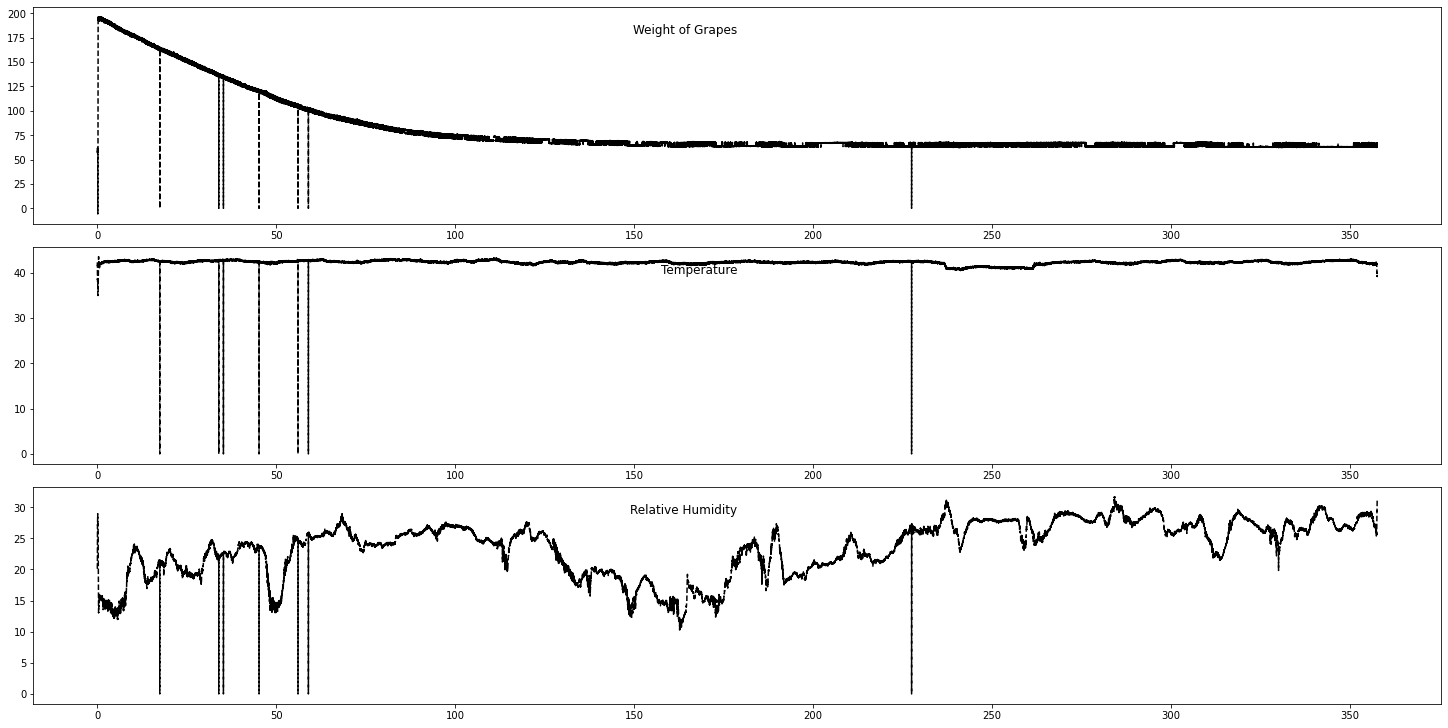

In [11]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, 1, figsize=(20, 10), constrained_layout=True)
axs[0].plot(frame['t'], frame['W'], 'k--',);
axs[1].plot(frame['t'], frame['T_center'], 'k--',);
axs[2].plot(frame['t'], frame['RH_center'], 'k--',);

ax = axs[0]; ax.set_title('Weight of Grapes', loc='right', y=0.85, x=0.5, fontsize='large');
ax = axs[1]; ax.set_title('Temperature', loc='right', y=0.85, x=0.5, fontsize='large');
ax = axs[2]; ax.set_title('Relative Humidity', loc='right', y=0.85, x=0.5, fontsize='large');

#### Frequency of data collection is excessively high. Therefore reading are averaged over _nset_ number of values and a function is written for the same, which can be seen in the snippet below.

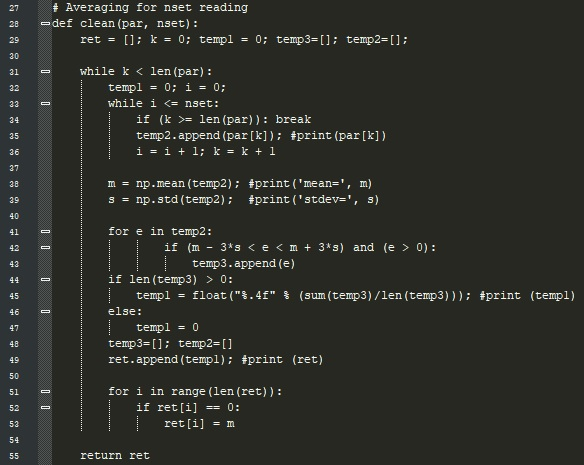

In [12]:
# Data Cleaning, preprocessing
nset   = 120/6
tRed   = dc.clean(frame["t"],6*nset);
wRed   = dc.clean(frame["W"],6*nset);         print("Weight      :  min = ", round(min(wRed),2)," max = ", round(max(wRed),2))
TRed   = dc.clean(frame["T_center"],6*nset);  print("Temperature :  min = ", round(min(TRed),2)," max =  ", round(max(TRed),2))
HRed   = dc.clean(frame["RH_center"],6*nset); print("Re.Humidity :  min = ", round(min(HRed),2)," max =  ", round(max(HRed),2))
print("Time        :  min =  ", round(min(tRed),2)," max = ", round(max(tRed),2))

Weight      :  min =  62.85  max =  194.35
Temperature :  min =  38.27  max =   43.04
Re.Humidity :  min =  11.23  max =   31.23
Time        :  min =   0.17  max =  357.43


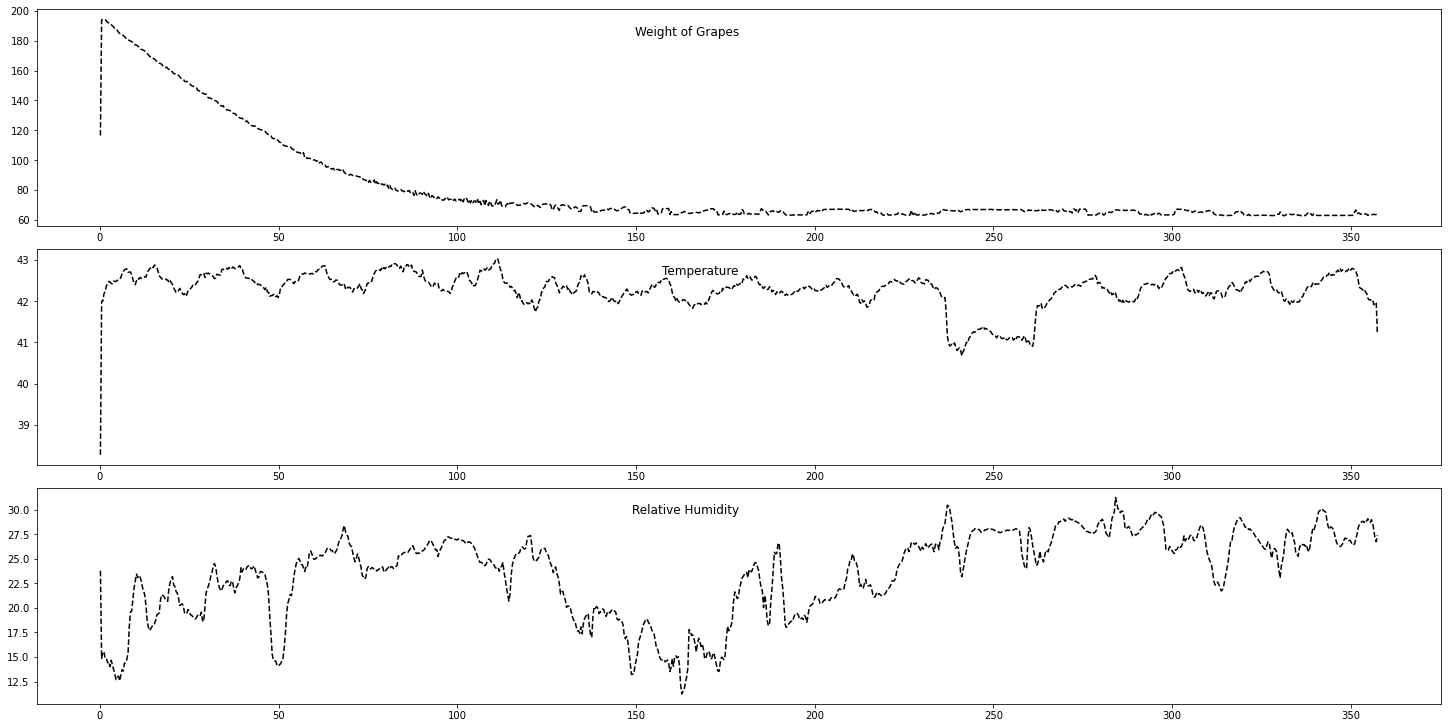

In [13]:
fig, axs = plt.subplots(3, 1, figsize=(20, 10), constrained_layout=True)
axs[0].plot(tRed, wRed, 'k--',);
axs[1].plot(tRed, TRed, 'k--',);
axs[2].plot(tRed, HRed, 'k--',);

ax = axs[0]; ax.set_title('Weight of Grapes', loc='right', y=0.85, x=0.5, fontsize='large');
ax = axs[1]; ax.set_title('Temperature', loc='right', y=0.85, x=0.5, fontsize='large');
ax = axs[2]; ax.set_title('Relative Humidity', loc='right', y=0.85, x=0.5, fontsize='large');

## STEP 3 : Pre-processing

In [14]:
tRed = tRed[1:]
wRed = wRed[1:]
TRed = TRed[1:]
HRed = HRed[1:]

#### Two new features are created Moisture Content and Moirture Ratio as decribed in [Kulkarni et al. (2022)](https://onlinelibrary.wiley.com/doi/epdf/10.1002/cjce.24514)
Functions are written in the user defined library as shown in snippets below

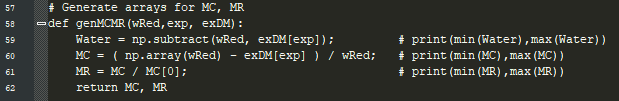

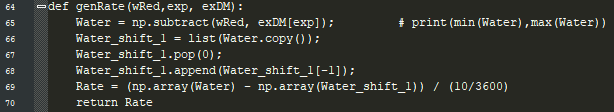

In [15]:
MC, MR = dc.genMCMR(wRed, exp, exDM);
Rate   = dc.genRate(wRed,exp, exDM);

print("MC :   min =    ", round(min(MC),2), 'kg/kg')
print("MC :   max =    ", round(max(MC),2), 'kg/kg')

print("Rate : min =", round(min(Rate),2), ' kg/hr')
print("Rate : max = ", round(max(Rate),2), 'kg/hr')

MC :   min =     0.23 kg/kg
MC :   max =     0.75 kg/kg
Rate : min = -1251.0  kg/hr
Rate : max =  1432.51 kg/hr


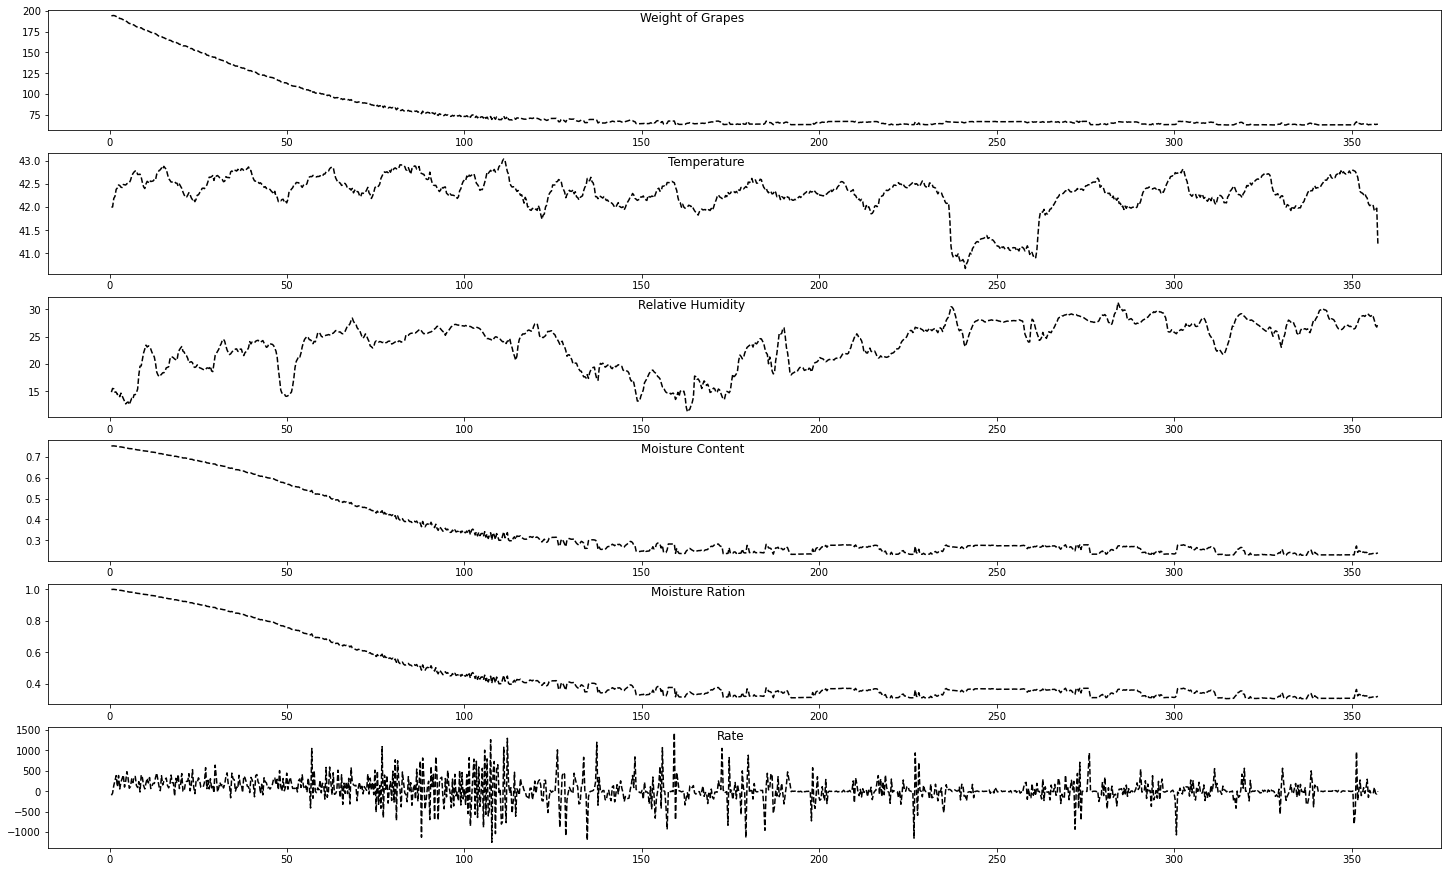

In [16]:
fig, axs = plt.subplots(6, 1, figsize=(20, 12), constrained_layout=True)
axs[0].plot(tRed, wRed, 'k--',);
axs[1].plot(tRed, TRed, 'k--',);
axs[2].plot(tRed, HRed, 'k--',);
axs[3].plot(tRed, MC, 'k--',);
axs[4].plot(tRed, MR, 'k--',);
axs[5].plot(tRed, Rate, 'k--',);

ax = axs[0]; ax.set_title('Weight of Grapes', loc='right', y=0.85, x=0.5, fontsize='large');
ax = axs[1]; ax.set_title('Temperature', loc='right', y=0.85, x=0.5, fontsize='large');
ax = axs[2]; ax.set_title('Relative Humidity', loc='right', y=0.85, x=0.5, fontsize='large');
ax = axs[3]; ax.set_title('Moisture Content', loc='right', y=0.85, x=0.5, fontsize='large');
ax = axs[4]; ax.set_title('Moisture Ration', loc='right', y=0.85, x=0.5, fontsize='large');
ax = axs[5]; ax.set_title('Rate', loc='right', y=0.85, x=0.5, fontsize='large');

In [17]:
df_exp9 = pd.DataFrame({'Time': tRed,
                        'Weight': wRed,
                        'Temperature': TRed,
                        'Humidity': HRed,
                        'Moisture_Content': MC,
                        'Moisture_Ratio': MR,
                        'Rate': Rate,
                       })

## STEP 4 : Exploratory Data Analysis

In [18]:
import numpy as np

Weight min : 62.8452 grams
Weight max : 194.3526 grams


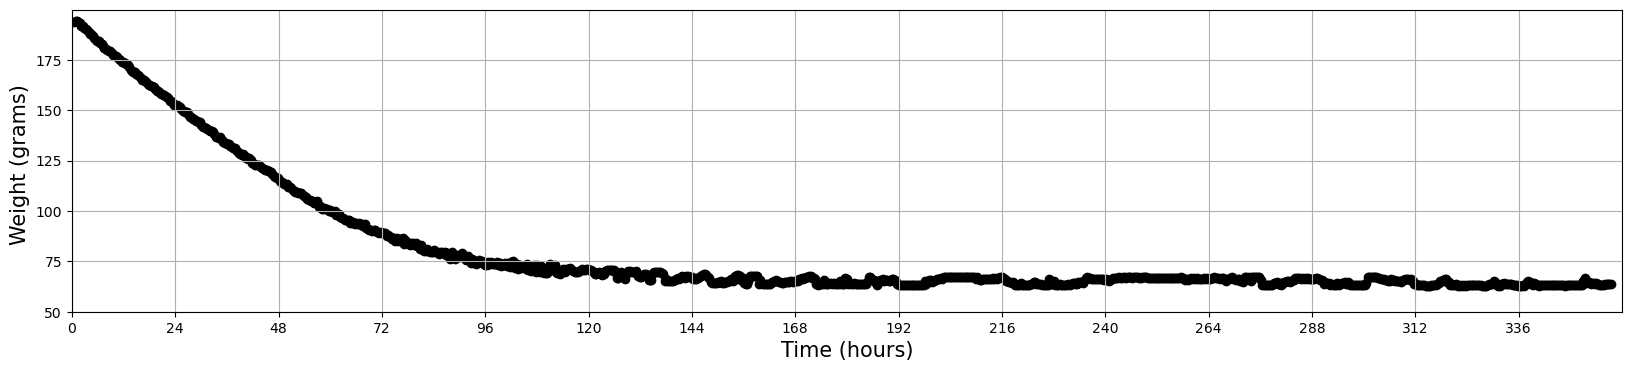

In [19]:
# Weight data
plt.figure(num=None, figsize=(20, 4), dpi=100, facecolor='w', edgecolor='k')
plt.scatter(df_exp9['Time'], 
            df_exp9['Weight'],
            linestyle='-', 
            marker='o', 
            color='k', 
            linewidth=1,
            )

xmin, xmax, xint, ymin, ymax, yint = 0, 360, 24, 50, 200, 25
plt.xticks(np.arange(xmin,xmax,xint), fontsize=10); plt.xlabel('Time (hours)', fontsize=15)
plt.yticks(np.arange(ymin,ymax,yint), fontsize=10); plt.ylabel('Weight (grams) ', fontsize=15)
plt.grid(True); plt.ylim((ymin,ymax)); plt.xlim((xmin,xmax));

print("Weight min :", df_exp9.Weight.min(), "grams")
print("Weight max :", df_exp9.Weight.max(), "grams")

Temperature min  : 40.6714 deg C
Temperature max  : 43.0379 deg C
Temperature mean : 42.2913 deg C
Temperature std  :  0.4102 deg C
Temperature var  :  0.1683 deg C


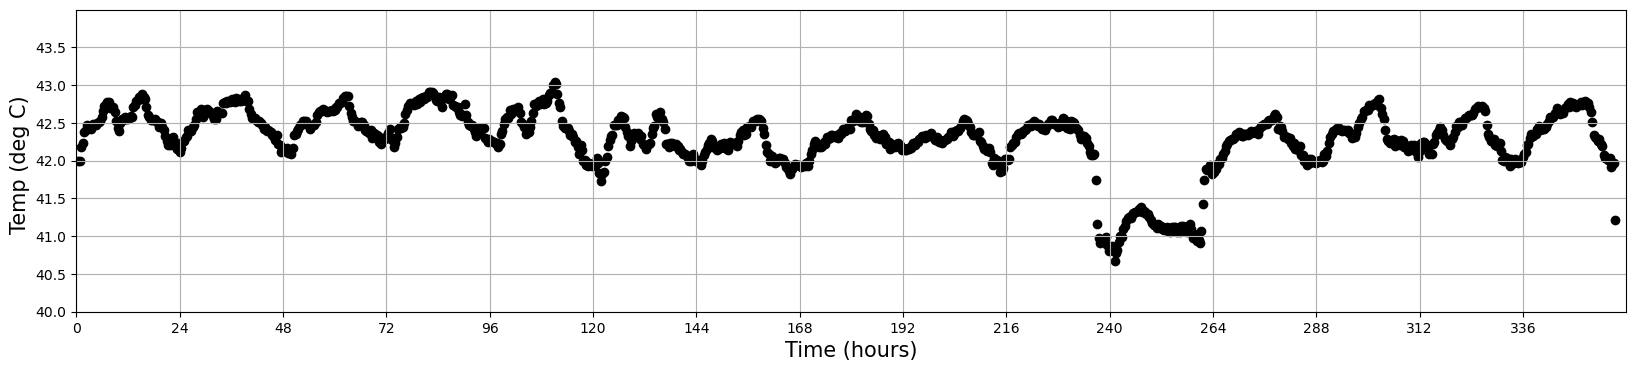

In [20]:
# Temperature data
plt.figure(num=None, figsize=(20, 4), dpi=100, facecolor='w', edgecolor='k')
plt.scatter(df_exp9['Time'], 
            df_exp9['Temperature'],
            linestyle='-', 
            marker='o', 
            color='k', 
            linewidth=1,
            )

xmin, xmax, xint, ymin, ymax, yint = 0, 360, 24, 40, 44, 0.5
plt.xticks(np.arange(xmin,xmax,xint), fontsize=10); plt.xlabel('Time (hours)', fontsize=15)
plt.yticks(np.arange(ymin,ymax,yint), fontsize=10); plt.ylabel('Temp (deg C) ', fontsize=15)
plt.grid(True); plt.ylim((ymin,ymax)); plt.xlim((xmin,xmax));

print("Temperature min  :", df_exp9.Temperature.min(), "deg C")
print("Temperature max  :", df_exp9.Temperature.max(), "deg C")
print("Temperature mean :", round(df_exp9.Temperature.mean(), 4), "deg C")
print("Temperature std  : ", round(df_exp9.Temperature.std(), 4), "deg C")
print("Temperature var  : ", round(df_exp9.Temperature.var(), 4), "deg C")

Humidity min  : 11.2347 %
Humidity max  : 31.2344 %
Humidity mean : 23.6128 %
Humidity std  :  4.2727 %
Humidity var  : 18.2561 %


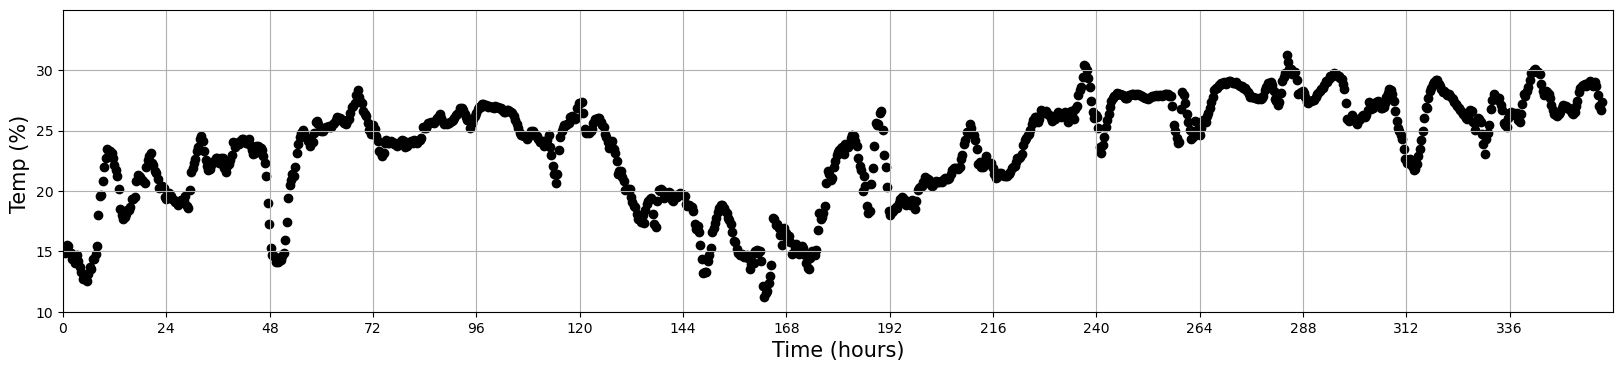

In [21]:
# Relative Humidity data
plt.figure(num=None, figsize=(20, 4), dpi=100, facecolor='w', edgecolor='k')
plt.scatter(df_exp9['Time'], 
            df_exp9['Humidity'],
            linestyle='-', 
            marker='o', 
            color='k', 
            linewidth=1,
            )

xmin, xmax, xint, ymin, ymax, yint = 0, 360, 24, 10, 35, 5
plt.xticks(np.arange(xmin,xmax,xint), fontsize=10); plt.xlabel('Time (hours)', fontsize=15)
plt.yticks(np.arange(ymin,ymax,yint), fontsize=10); plt.ylabel('Temp (%) ', fontsize=15)
plt.grid(True); plt.ylim((ymin,ymax)); plt.xlim((xmin,xmax));

print("Humidity min  :", df_exp9.Humidity.min(), "%")
print("Humidity max  :", df_exp9.Humidity.max(), "%")
print("Humidity mean :", round(df_exp9.Humidity.mean(), 4), "%")
print("Humidity std  : ", round(df_exp9.Humidity.std(), 4), "%")
print("Humidity var  :", round(df_exp9.Humidity.var(), 4), "%")

Moisture Content min : 0.2289 kg/kg
Moisture Content max : 0.7507 kg/kg


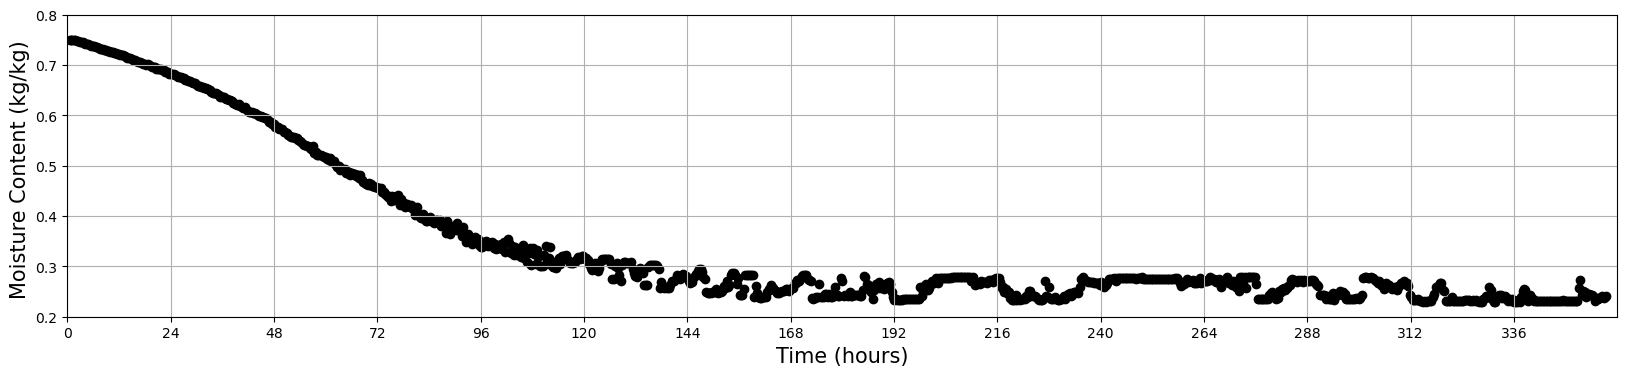

In [22]:
# Moisture Content data
plt.figure(num=None, figsize=(20, 4), dpi=100, facecolor='w', edgecolor='k')
plt.scatter(df_exp9['Time'], 
            df_exp9['Moisture_Content'],
            linestyle='-', 
            marker='o', 
            color='k', 
            linewidth=1,
            )

xmin, xmax, xint, ymin, ymax, yint = 0, 360, 24, 0.2, 0.8, 0.1
plt.xticks(np.arange(xmin,xmax,xint), fontsize=10); plt.xlabel('Time (hours)', fontsize=15)
plt.yticks(np.arange(ymin,ymax,yint), fontsize=10); plt.ylabel('Moisture Content (kg/kg) ', fontsize=15)
plt.grid(True); plt.ylim((ymin,ymax)); plt.xlim((xmin,xmax));

print("Moisture Content min :", round(df_exp9.Moisture_Content.min(),4), "kg/kg")
print("Moisture Content max :", round(df_exp9.Moisture_Content.max(),4), "kg/kg")


Moisture Ratio min : 0.3052
Moisture Ratio max : 1.0007


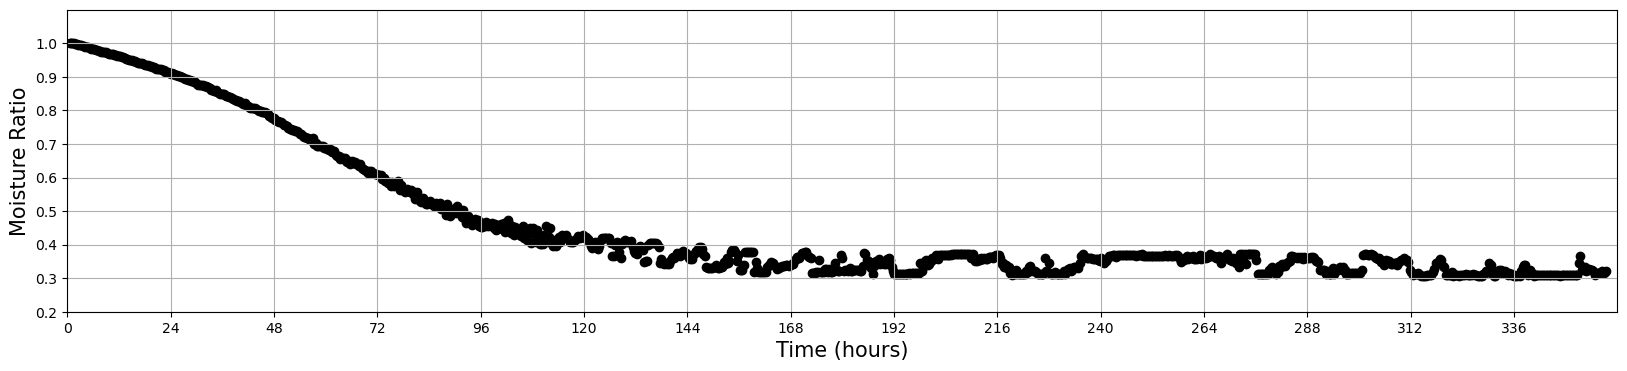

In [23]:
# Moisture Ratio data
plt.figure(num=None, figsize=(20, 4), dpi=100, facecolor='w', edgecolor='k')
plt.scatter(df_exp9['Time'], 
            df_exp9['Moisture_Ratio'],
            linestyle='-', 
            marker='o', 
            color='k', 
            linewidth=1,
            )

xmin, xmax, xint, ymin, ymax, yint = 0, 360, 24, 0.2, 1.1, 0.1
plt.xticks(np.arange(xmin,xmax,xint), fontsize=10); plt.xlabel('Time (hours)', fontsize=15)
plt.yticks(np.arange(ymin,ymax,yint), fontsize=10); plt.ylabel('Moisture Ratio', fontsize=15)
plt.grid(True); plt.ylim((ymin,ymax)); plt.xlim((xmin,xmax));

print("Moisture Ratio min :", round(df_exp9.Moisture_Ratio.min(),4),)
print("Moisture Ratio max :", round(df_exp9.Moisture_Ratio.max(),4),)


Moisture Rate min : 0.3052
Moisture Rate max : 1.0007


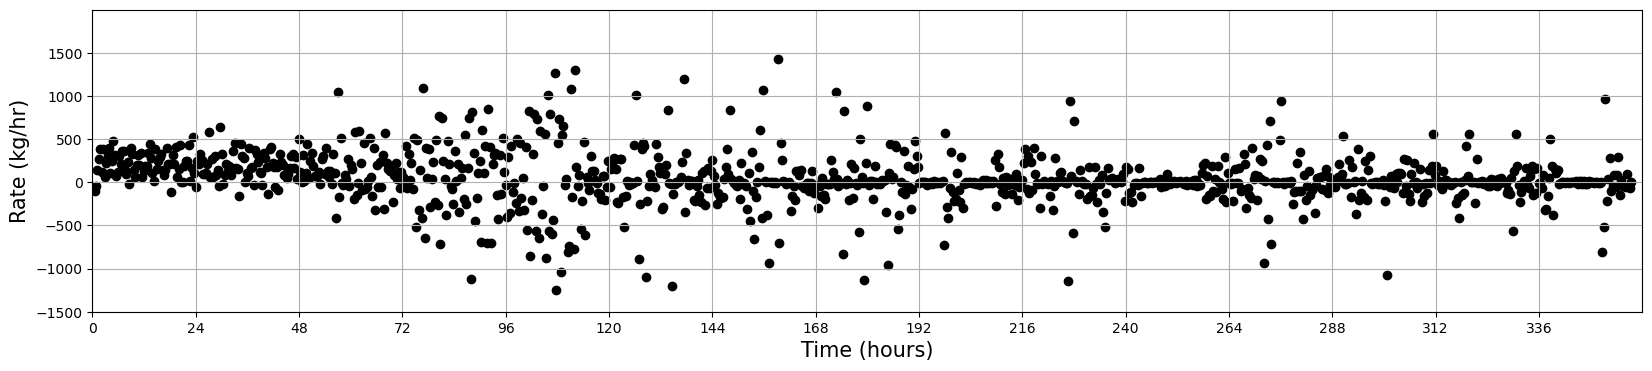

In [24]:
# Moisture Rate data
plt.figure(num=None, figsize=(20, 4), dpi=100, facecolor='w', edgecolor='k')
plt.scatter(df_exp9['Time'], 
            df_exp9['Rate'],
            linestyle='-', 
            marker='o', 
            color='k', 
            linewidth=1,
            )

xmin, xmax, xint, ymin, ymax, yint = 0, 360, 24, -1500, 2000, 500
plt.xticks(np.arange(xmin,xmax,xint), fontsize=10); plt.xlabel('Time (hours)', fontsize=15)
plt.yticks(np.arange(ymin,ymax,yint), fontsize=10); plt.ylabel('Rate (kg/hr)', fontsize=15)
plt.grid(True); plt.ylim((ymin,ymax)); plt.xlim((xmin,xmax));

print("Moisture Rate min :", round(df_exp9.Moisture_Ratio.min(),4),)
print("Moisture Rate max :", round(df_exp9.Moisture_Ratio.max(),4),)

Moisture Rate Normalized min : -13.2141
Moisture Rate Normalized max :  16.1227


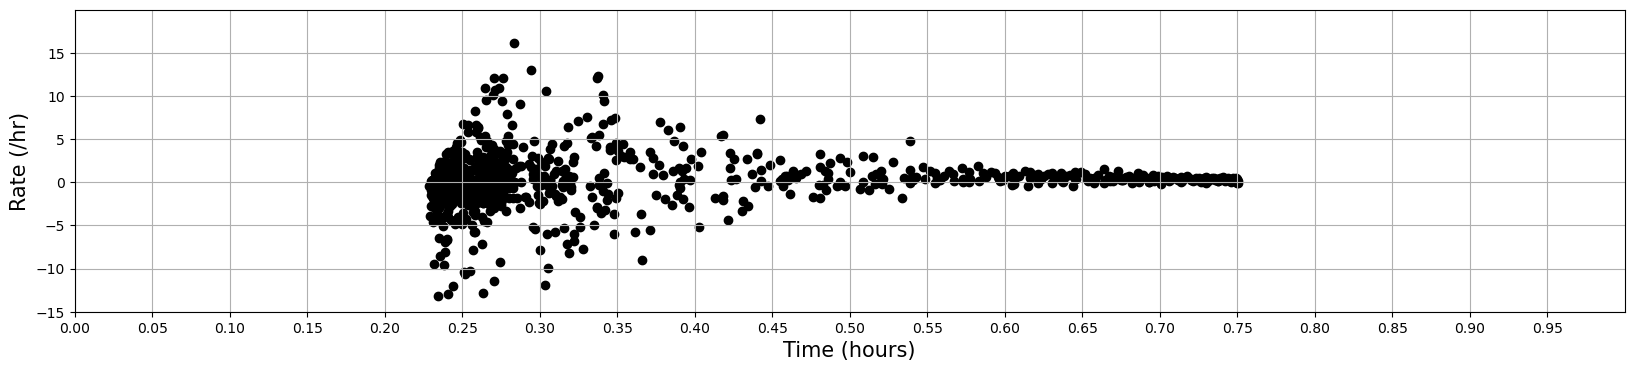

In [25]:
# Moisture Rate data
plt.figure(num=None, figsize=(20, 4), dpi=100, facecolor='w', edgecolor='k')
plt.scatter(df_exp9['Moisture_Content'], 
            (df_exp9['Moisture_Content'] - df_exp9['Moisture_Content'].shift(-1)) / (10/3600),
            linestyle='-', 
            marker='o', 
            color='k', 
            linewidth=1,
            )

xmin, xmax, xint, ymin, ymax, yint = 0, 1, 0.05, -15, 20, 5
plt.xticks(np.arange(xmin,xmax,xint), fontsize=10); plt.xlabel('Time (hours)', fontsize=15)
plt.yticks(np.arange(ymin,ymax,yint), fontsize=10); plt.ylabel('Rate (/hr)', fontsize=15)
plt.grid(True); plt.ylim((ymin,ymax)); plt.xlim((xmin,xmax));
df_exp9['Rate_norm'] = (df_exp9['Moisture_Content'] - df_exp9['Moisture_Content'].shift(-1)) / (10/3600)
print("Moisture Rate Normalized min :", round(df_exp9.Rate_norm.min(),4),)
print("Moisture Rate Normalized max : ", round(df_exp9.Rate_norm.max(),4),)

#### Moving averages comparison 

In [27]:
from sklearn.metrics import mean_squared_error

def get_mape(actual, predicted):
    y_true, y_predicted = np.array(actual), np.array(predicted)
    return np.round(np.mean(np.abs(((y_true - y_predicted) / (y_true)) *100)), 4)

def get_rmse(actual, predicted):
    return np.round(mean_squared_error(actual, predicted) ** 0.5, 4)

C:\Users\ameya\AppData\Local\Temp/ipykernel_13488/2833283585.py:5: RuntimeWarning: divide by zero encountered in true_divide
  return np.round(np.mean(np.abs(((y_true - y_predicted) / (y_true)) *100)), 4)
C:\Users\ameya\AppData\Local\Temp/ipykernel_13488/2833283585.py:5: RuntimeWarning: divide by zero encountered in true_divide
  return np.round(np.mean(np.abs(((y_true - y_predicted) / (y_true)) *100)), 4)
C:\Users\ameya\AppData\Local\Temp/ipykernel_13488/2833283585.py:5: RuntimeWarning: divide by zero encountered in true_divide
  return np.round(np.mean(np.abs(((y_true - y_predicted) / (y_true)) *100)), 4)
C:\Users\ameya\AppData\Local\Temp/ipykernel_13488/2833283585.py:5: RuntimeWarning: divide by zero encountered in true_divide
  return np.round(np.mean(np.abs(((y_true - y_predicted) / (y_true)) *100)), 4)
C:\Users\ameya\AppData\Local\Temp/ipykernel_13488/2833283585.py:5: RuntimeWarning: divide by zero encountered in true_divide
  return np.round(np.mean(np.abs(((y_true - y_predicted

   Rolling  mape   rmse
0        6   inf 314.85
1       12   inf 301.72
2       24   inf 295.92
3       48   inf 295.59
4       96   inf 299.26


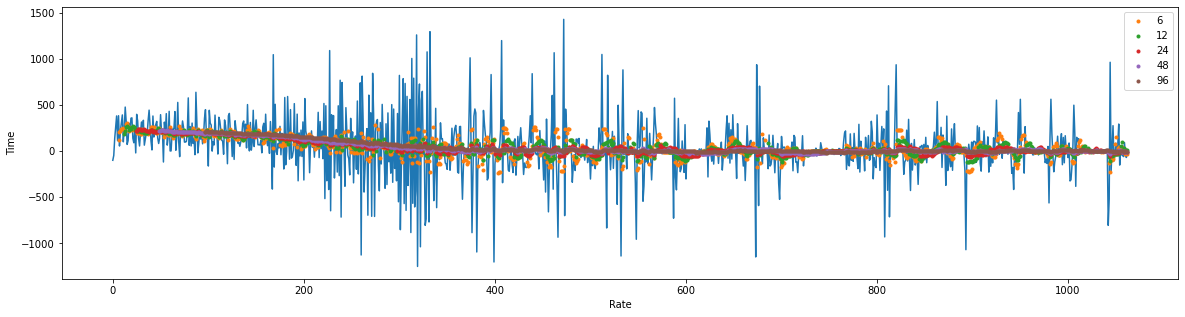

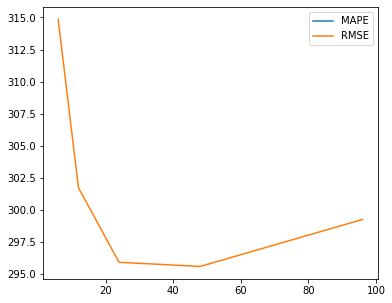

In [28]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
list_mape = []; list_rmse = [];

plt.figure(figsize=(20,5))
plt.xlabel("Rate"); plt.ylabel("Time")
plt.plot(df_exp9['Rate'], '-');
for i in [6, 12, 24, 48, 96]:
    name = 'mavg_' + str(i)
    df_exp9[name] = df_exp9['Rate'].rolling(window = i).mean().shift(1)
    plt.plot(df_exp9[name][i:], '.', label=f'{i}');
    mape = get_mape(df_exp9['Rate'][i:],df_exp9[name][i:]); list_mape.append(mape)
    rmse = get_rmse(df_exp9['Rate'][i:],df_exp9[name][i:]); list_rmse.append(rmse)
    plt.legend();

df_mavg = pd.DataFrame({'Rolling': [6, 12, 24, 48, 96],
                        'mape': list_mape,
                        'rmse': list_rmse
                       })

plt.figure(figsize=(6,5))
plt.plot(df_mavg.Rolling, df_mavg.mape, label='MAPE');
plt.plot(df_mavg.Rolling, df_mavg.rmse, label='RMSE');
plt.legend();

print(df_mavg)

#### Exponential Smoothing

C:\Users\ameya\AppData\Local\Temp/ipykernel_13488/2833283585.py:5: RuntimeWarning: divide by zero encountered in true_divide
  return np.round(np.mean(np.abs(((y_true - y_predicted) / (y_true)) *100)), 4)
C:\Users\ameya\AppData\Local\Temp/ipykernel_13488/2833283585.py:5: RuntimeWarning: divide by zero encountered in true_divide
  return np.round(np.mean(np.abs(((y_true - y_predicted) / (y_true)) *100)), 4)
C:\Users\ameya\AppData\Local\Temp/ipykernel_13488/2833283585.py:5: RuntimeWarning: divide by zero encountered in true_divide
  return np.round(np.mean(np.abs(((y_true - y_predicted) / (y_true)) *100)), 4)
C:\Users\ameya\AppData\Local\Temp/ipykernel_13488/2833283585.py:5: RuntimeWarning: divide by zero encountered in true_divide
  return np.round(np.mean(np.abs(((y_true - y_predicted) / (y_true)) *100)), 4)
C:\Users\ameya\AppData\Local\Temp/ipykernel_13488/2833283585.py:5: RuntimeWarning: divide by zero encountered in true_divide
  return np.round(np.mean(np.abs(((y_true - y_predicted

   Rolling  mape   rmse
0     0.01   inf 286.43
1     0.05   inf 278.80
2     0.10   inf 269.88
3     0.20   inf 250.08
4     0.50   inf 177.43


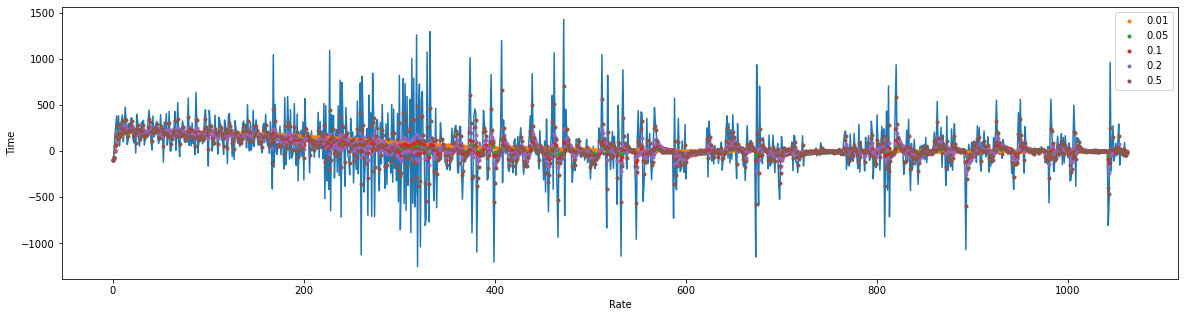

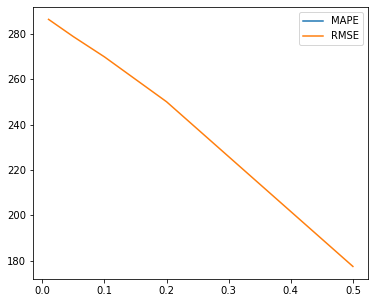

In [29]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
list_mape = []; list_rmse = [];

plt.figure(figsize=(20,5))
plt.xlabel("Rate"); plt.ylabel("Time")
plt.plot(df_exp9['Rate']);
for i in [0.01, 0.05, 0.1, 0.2, 0.5]:
    name = 'ewm_' + str(i)
    df_exp9[name] = df_exp9['Rate'].ewm(alpha = i).mean()
    plt.plot(df_exp9[name], '.', label=f'{i}');
    mape = get_mape(df_exp9['Rate'],df_exp9[name]); list_mape.append(mape)
    rmse = get_rmse(df_exp9['Rate'],df_exp9[name]); list_rmse.append(rmse)
    plt.legend();

df_ewm = pd.DataFrame({'Rolling': [0.01, 0.05, 0.1, 0.2, 0.5],
                        'mape': list_mape,
                        'rmse': list_rmse});

plt.figure(figsize=(6,5))
plt.plot(df_ewm.Rolling, df_ewm.mape, label='MAPE');
plt.plot(df_ewm.Rolling, df_ewm.rmse, label='RMSE');
plt.legend();

print(df_ewm)

#### Decomposition 

C:\Users\ameya\AppData\Local\Temp/ipykernel_13488/1491947675.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomp_temp = seasonal_decompose(np.array(df_exp9['Temperature']),


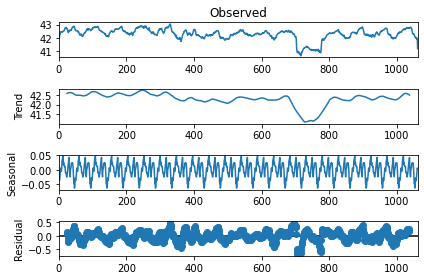

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Temperature Decompostion
decomp_temp = seasonal_decompose(np.array(df_exp9['Temperature']),
                                model='additive',
                                freq=48,
                                ).plot()

C:\Users\ameya\AppData\Local\Temp/ipykernel_13488/325314936.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomp_humi = seasonal_decompose(np.array(df_exp9['Humidity']),


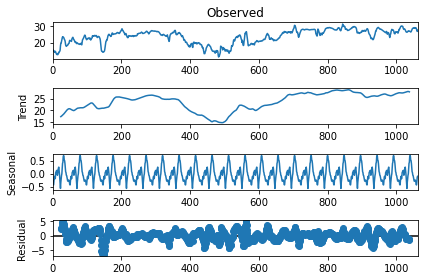

In [42]:
# Decompose Relative humidity
decomp_humi = seasonal_decompose(np.array(df_exp9['Humidity']),
                                model='additive',
                                freq=48,
                                ).plot()

C:\Users\ameya\AppData\Local\Temp/ipykernel_13488/452651705.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomp_weight = seasonal_decompose(np.array(df_exp9['Weight']),


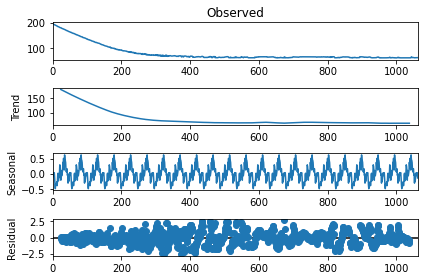

In [43]:
# Decompose Weight
decomp_weight = seasonal_decompose(np.array(df_exp9['Weight']),
                                model='additive',
                                freq=48
                                ).plot()

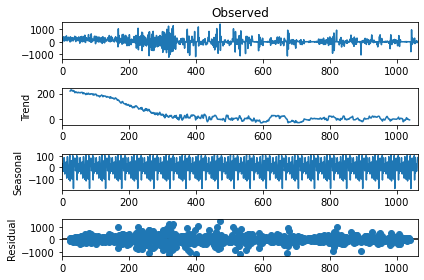

In [172]:
# Decompose First Diff of 'Weight' i.e. Rate
decomp_rate = seasonal_decompose(np.array(df_exp9['Rate']),
                                model='additive',
                                period=48
                                ).plot()

In [163]:
df_exp9['Rate_trend'] = seasonal_decompose(np.array(df_exp9['Rate']),
                                model='additive',
                                period=48
                                ).trend
df_exp9['Rate_seasonal'] = seasonal_decompose(np.array(df_exp9['Rate']),
                                model='additive',
                                period=48
                                ).seasonal

Index(['Time', 'Weight', 'Temperature', 'Humidity', 'Moisture_Content',
       'Moisture_Ratio', 'Rate', 'Rate_norm', 'mavg_6', 'mavg_12', 'mavg_24',
       'mavg_48', 'mavg_96', 'ewm_0.01', 'ewm_0.05', 'ewm_0.1', 'ewm_0.2',
       'ewm_0.5', 'Rate_trend', 'Rate_seasonal'],
      dtype='object')
300


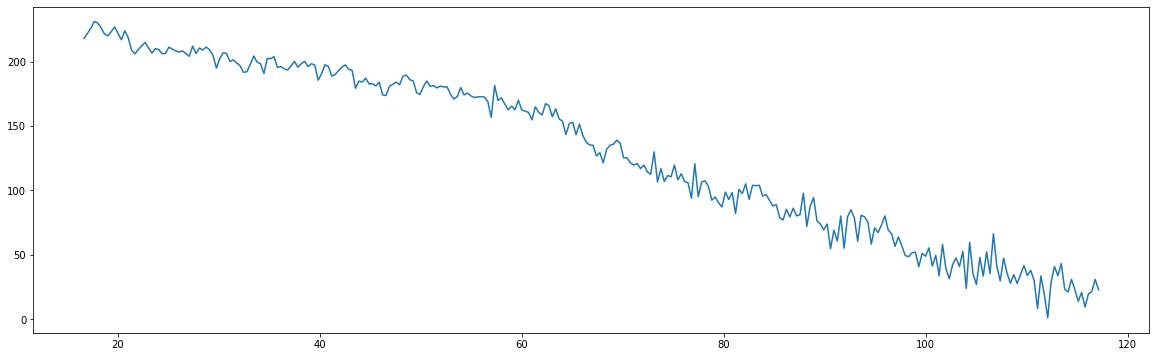

In [345]:
print(df_exp9.columns)

plt.figure(figsize=(20,6))
plt.plot(df_exp9['Time'][48:348], #df_test.Time[:300],
         df_exp9['mavg_48'][48:348], #df_test.mavg_96[:300]
        ); 

df_test = pd.DataFrame({'Time': np.arange(300), #df_exp9['Time'][0:300],
                        'mavg_48': df_exp9['mavg_48'][48:348],
                      }); #.set_index('Time');

print(len(df_test.mavg_48))

In [457]:
 df_test

,Time,mavg_48
48,0,218.04
49,1,221.84
50,2,225.76
51,3,231.13
52,4,229.94
...,...,...
343,295,9.25
344,296,19.56
345,297,21.26
346,298,30.79


####  ACF , PACF plots

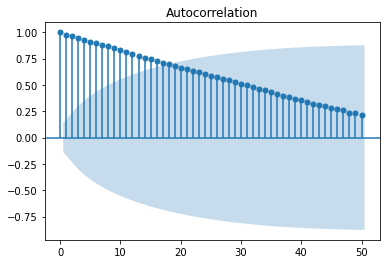

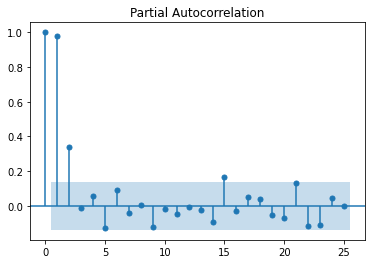

In [450]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

data = df_test['mavg_48'][:201]

acf_plot = plot_acf(data,
                    lags = 50,
                   );

pacf_plot = plot_pacf(data,
                     lags = 25,
                     )

## STEP 5 : Model building

#### Auto Regressive Model

In [451]:
from statsmodels.tsa.arima_model import ARIMA

def model_ar(p,d,q):

    import warnings
    warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning);
    warnings.filterwarnings('ignore', 'stat;smodels.tsa.arima_model.ARIMA',
                        FutureWarning)

    arima = ARIMA(data,
                order=(p,d,q), 
                );

    ar_model = arima.fit();
    print(ar_model.summary2())

    # Train
    forecast_ = ar_model.predict(start=0, end=200)
    print(get_mape(df_test.mavg_48[0:201], forecast_))

    plt.figure(figsize=(20,6))
    plt.plot(df_test['Time'][0:201], df_test['mavg_48'][0:201], label='Actual' );
    plt.plot(df_test['Time'][0:201], forecast_ , label='Predicted');
    plt.title('Train'); plt.legend();

    # Test
    forecast_ = ar_model.predict(start=201, end=300)
    print(get_mape(df_test.mavg_48[200:300], forecast_))

    plt.figure(figsize=(20,6))
    plt.plot(df_test['Time'][201:300], df_test['mavg_48'][201:300], label='Actual' );
    plt.plot(df_test['Time'][200:300], forecast_ , label='Predicted');
    plt.title('Test'); plt.legend();


c:\Users\ameya\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                           Results: ARMA
Model:              ARMA             BIC:                 1315.3547
Dependent Variable: mavg_48          Log-Likelihood:      -644.42  
Date:               2022-11-24 19:21 Scale:               1.0000   
No. Observations:   201              Method:              css-mle  
Df Model:           4                Sample:              0        
Df Residuals:       197                                   1        
Converged:          1.0000           S.D. of innovations: 5.902    
No. Iterations:     42.0000          HQIC:                1305.522 
AIC:                1298.8382                                      
--------------------------------------------------------------------
                Coef.    Std.Err.    t     P>|t|    [0.025   0.975] 
--------------------------------------------------------------------
const          161.0312   49.8698  3.2290  0.0012  63.2882  258.7742
ar.L1.mavg_48    0.4673    0.0706  6.6170  0.0000   0.3289    0.6058
ar

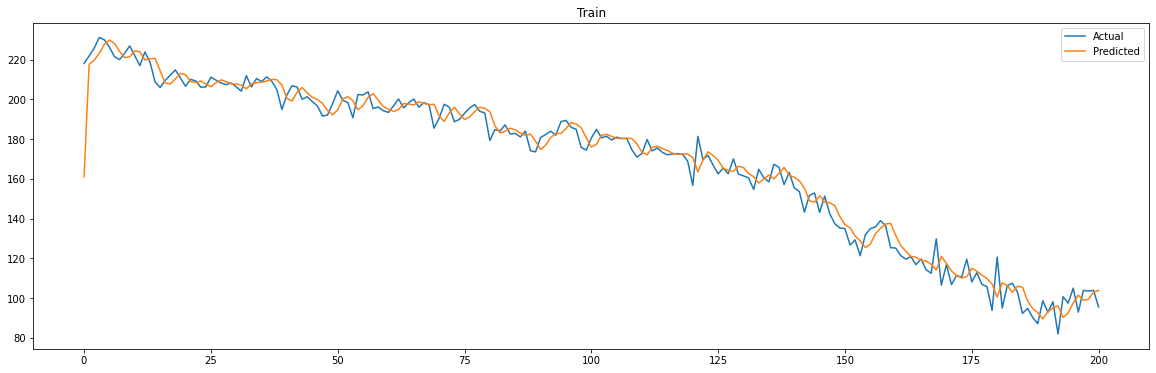

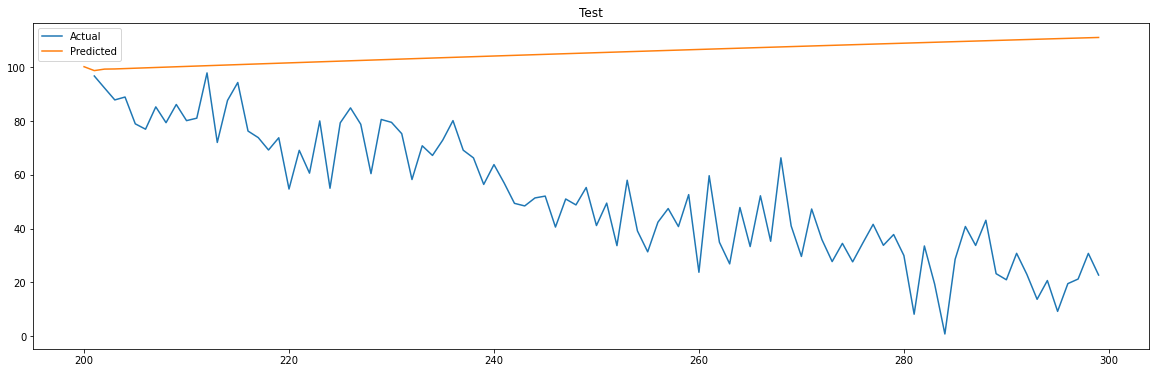

In [452]:
model_ar(3,0,0)

#### Moving Average Model

In [453]:
from statsmodels.tsa.arima_model import ARIMA

def model_ma(p,d,q):

    import warnings
    warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning);
    warnings.filterwarnings('ignore', 'stat;smodels.tsa.arima_model.ARIMA',
                        FutureWarning)

    arima = ARIMA(data,
                order=(p,d,q), 
                );

    ma_model = arima.fit();
    print(ma_model.summary2());

    # Test
    forecast_ = ma_model.predict(start=0, end=200)
    print(get_mape(df_test.mavg_48[0:201], forecast_))

    plt.figure(figsize=(20,6))
    plt.plot(df_test['Time'][0:201], df_test['mavg_48'][0:201], label='Actual' );
    plt.plot(df_test['Time'][0:201], forecast_ , label='Predicted');
    plt.title("Train"); plt.legend();

    # Train
    forecast_ = ma_model.predict(start=201, end=300)
    print(get_mape(df_test.mavg_48[200:300], forecast_))

    plt.figure(figsize=(20,6))
    plt.plot(df_test['Time'][201:300], df_test['mavg_48'][201:300], label='Actual' );
    plt.plot(df_test['Time'][200:300], forecast_ , label='Predicted');
    plt.title("Test"); plt.legend();

c:\Users\ameya\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                           Results: ARMA
Model:              ARMA             BIC:                 1567.2132
Dependent Variable: mavg_48          Log-Likelihood:      -767.70  
Date:               2022-11-24 19:21 Scale:               1.0000   
No. Observations:   201              Method:              css-mle  
Df Model:           5                Sample:              0        
Df Residuals:       196                                   1        
Converged:          1.0000           S.D. of innovations: 10.940   
No. Iterations:     23.0000          HQIC:                1555.413 
AIC:                1547.3934                                      
-------------------------------------------------------------------
                  Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
-------------------------------------------------------------------
const            168.7978   4.0096 42.0986 0.0000 160.9392 176.6565
ma.L1.mavg_48      1.2604   0.0705 17.8720 0.0000   1.1221   1.3986
ma.L2.m

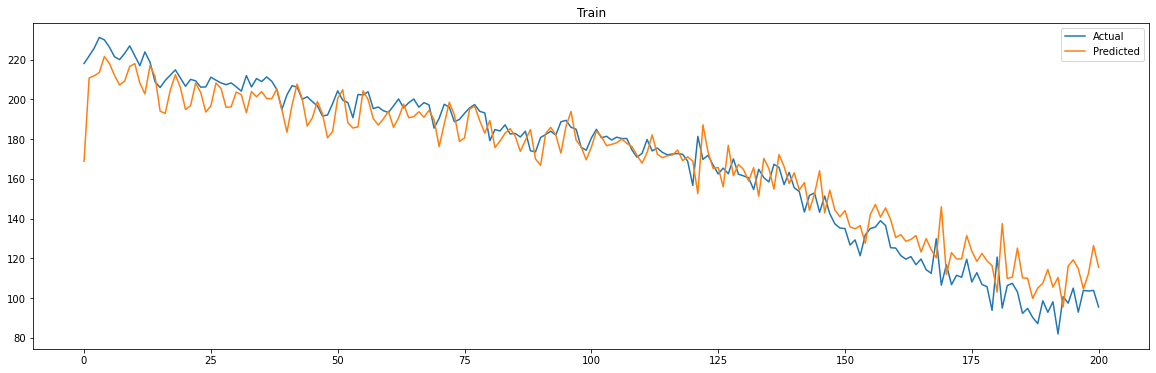

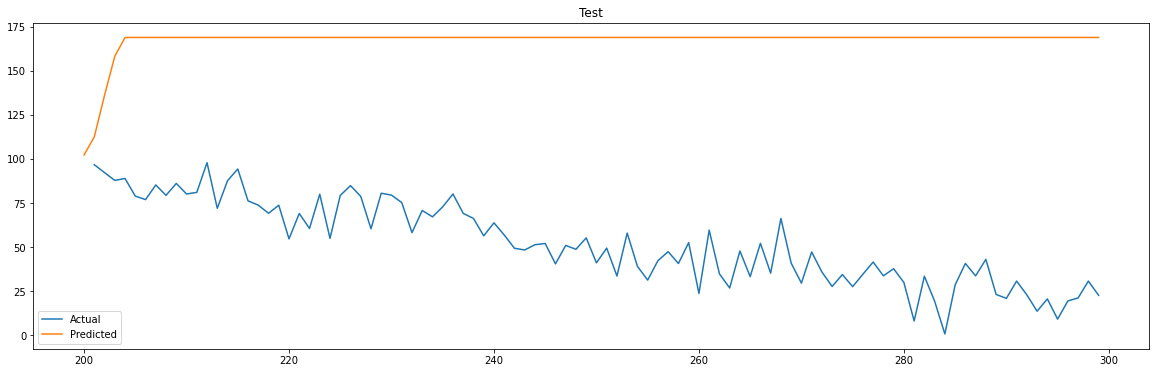

In [454]:
model_ma(0,0,4)

#### ARMA Model

In [455]:
def model_arma(p,d,q):

    arima = ARIMA(data,
                order=(p,d,q), 
                );

    arima_model = arima.fit();
    print(arma_model.summary2());

    # Test
    forecast_ = arima_model.predict(start=1, end=200)
    print(get_mape(df_test.mavg_48[1:201], forecast_))

    plt.figure(figsize=(20,6))
    plt.plot(df_test['Time'][1:201], df_test['mavg_48'][1:201], label='Actual' );
    plt.plot(df_test['Time'][1:201], forecast_ , label='Predicted');
    plt.title("Train"); plt.legend();

    # Train
    forecast_ = arima_model.predict(start=201, end=300)
    print(get_mape(df_test.mavg_48[200:300], forecast_))

    plt.figure(figsize=(20,6))
    plt.plot(df_test['Time'][201:300], df_test['mavg_48'][201:300], label='Actual' );
    plt.plot(df_test['Time'][200:300], forecast_ , label='Predicted');
    plt.title("Test"); plt.legend();

c:\Users\ameya\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                               Results: ARMA
Model:                  ARMA               BIC:                   1327.9613
Dependent Variable:     mavg_48            Log-Likelihood:        -642.77  
Date:                   2022-11-24 19:21   Scale:                 1.0000   
No. Observations:       201                Method:                css-mle  
Df Model:               7                  Sample:                0        
Df Residuals:           194                                       1        
Converged:              1.0000             S.D. of innovations:   5.749    
No. Iterations:         60.0000            HQIC:                  1312.228 
AIC:                    1301.5349                                          
---------------------------------------------------------------------------
                Coef.    Std.Err.      t       P>|t|    [0.025     0.975]  
---------------------------------------------------------------------------
const         -1318.0859   0.0068 -194094.1

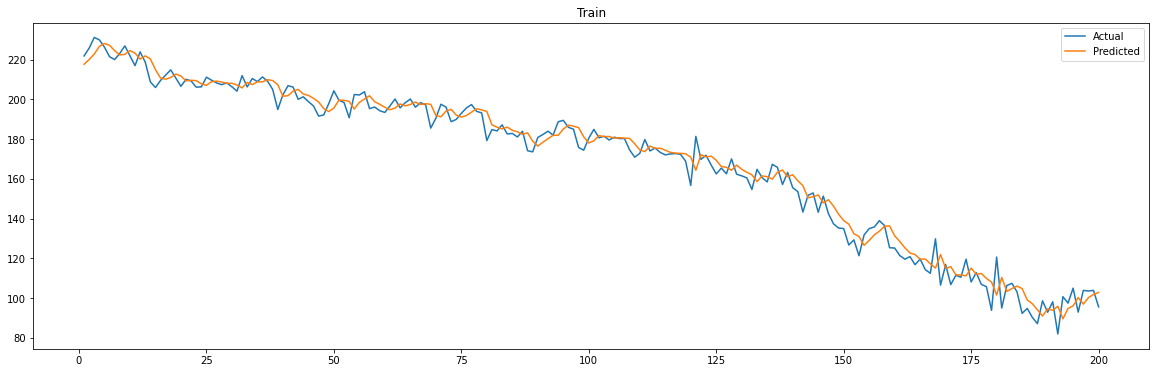

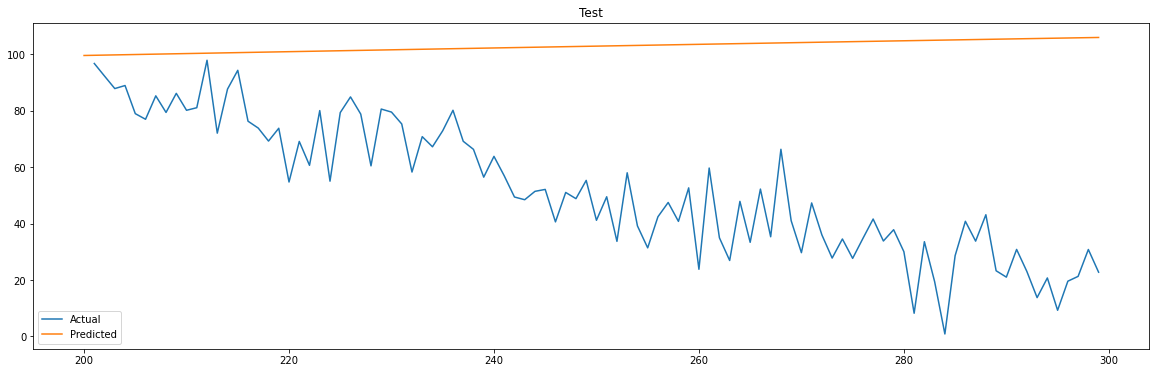

In [456]:
model_arma(1,0,1)

#### ARIMA

In [461]:
from statsmodels.tsa.stattools import adfuller
def dickeyFuller(input):
    adfuller_result = adfuller(input,
                               #autolog=None
                              )
    
    adfuller_out = pd.Series(adfuller_result[0:4],
                             index = ['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])
    
    print(adfuller_out)
dickeyFuller(df_test.mavg_48)

Test Statistic                  0.47
p-value                         0.98
Lags Used                      10.00
Number of Observations Used   289.00
dtype: float64


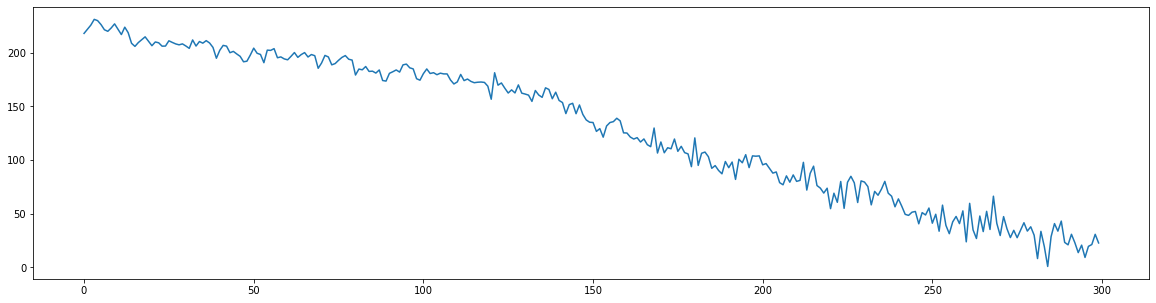

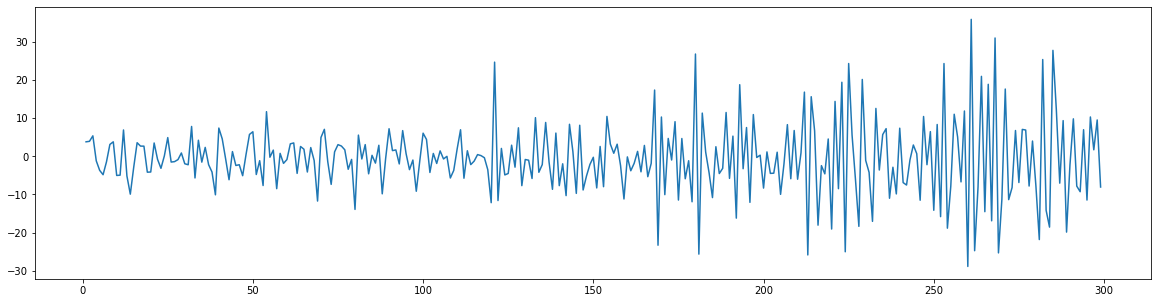

In [469]:
# Differencing
df_test['mavg_48_d1'] = df_test.mavg_48 - df_test.mavg_48.shift(1)

df_test.dropna()

plt.figure(figsize=(20,5))
plt.plot(df_test.Time, df_test.mavg_48, label='mavg_48')

plt.figure(figsize=(20,5))
plt.plot(df_test.Time, df_test.mavg_48_d1, label='mavg_48')

c:\Users\ameya\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


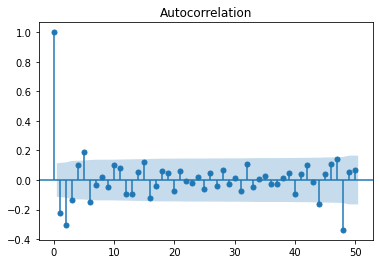

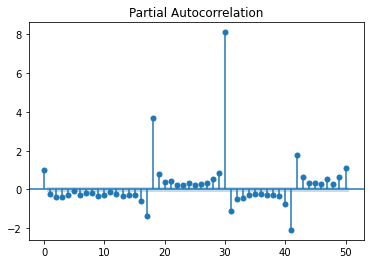

In [487]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

data = df_test['mavg_48_d1'].dropna()

acf_plot = plot_acf(arima_model.resid,
                    lags = 50,
                   );

pacf_plot = plot_pacf(arima_model.resid,
                     lags = 50,
                     )

In [510]:
df_test

,Time,mavg_48,mavg_48_d1
48,0,218.04,NaN
49,1,221.84,3.80
50,2,225.76,3.93
51,3,231.13,5.36
52,4,229.94,-1.19
...,...,...,...
343,295,9.25,-11.46
344,296,19.56,10.31
345,297,21.26,1.71
346,298,30.79,9.53


c:\Users\ameya\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\Users\ameya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. fo

                           Results: ARMA
Model:              ARMA             BIC:                 1282.6553
Dependent Variable: mavg_48_d1       Log-Likelihood:      -625.45  
Date:               2022-11-24 20:08 Scale:               1.0000   
No. Observations:   199              Method:              css-mle  
Df Model:           5                Sample:              0        
Df Residuals:       194                                   9        
Converged:          1.0000           S.D. of innovations: 5.598    
No. Iterations:     12.0000          HQIC:                1270.893 
AIC:                1262.8954                                      
-------------------------------------------------------------------
                     Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-------------------------------------------------------------------
const               -0.6252   0.1329 -4.7034 0.0000 -0.8857 -0.3647
ar.L1.mavg_48_d1     0.0474   0.1628  0.2914 0.7708 -0.2717  0.3666
ar.L2.m

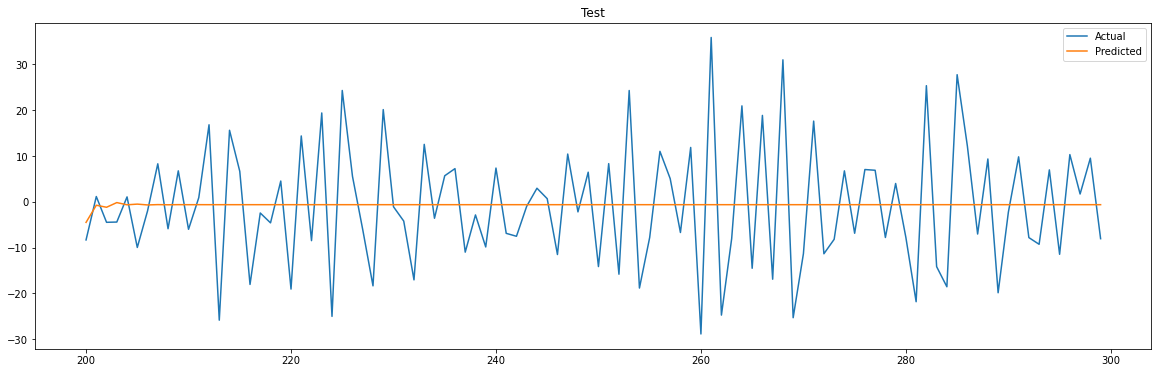

In [525]:
data_train = df_test.dropna()['mavg_48_d1'][:199]
data_test  = df_test.dropna()['mavg_48_d1'][199:]

arima = ARIMA(data_train,
                 order=(3,0,1), 
                 );

arima_model = arima.fit();
print(arima_model.summary2());

# Test
forecast_, stderr, ci = arima_model.forecast(steps = 100)
print(get_mape(data[199:], forecast_))

plt.figure(figsize=(20,6))
plt.plot(df_test['Time'][200:], df_test['mavg_48_d1'][200:], label='Actual' );
plt.plot(df_test['Time'][200:], forecast_ , label='Predicted');
plt.title("Test"); plt.legend();

## STEP 6 :  Evaluation and Validation